In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0



Epoch 1/5


1563/1563 [==============================] - 473s 299ms/step - loss: 2.0864 - accuracy: 0.3157 - val_loss: 1.4864 - val_accuracy: 0.4703
Epoch 2/5
1563/1563 [==============================] - 464s 297ms/step - loss: 1.5428 - accuracy: 0.4545 - val_loss: 1.3174 - val_accuracy: 0.5291
Epoch 3/5
1563/1563 [==============================] - 468s 299ms/step - loss: 1.3665 - accuracy: 0.5141 - val_loss: 1.2264 - val_accuracy: 0.5626
Epoch 4/5
1563/1563 [==============================] - 478s 306ms/step - loss: 1.2467 - accuracy: 0.5605 - val_loss: 1.1513 - val_accuracy: 0.5934
Epoch 5/5
313/313 [==============================] - 37s 117ms/step - loss: 1.1034 - accuracy: 0.6097
Epoch 1/5
1563/1563 [==============================] - 768s 485ms/step - loss: 1.4378 - accuracy: 0.4997 - val_loss: 1.0820 - val_accuracy: 0.6151
Epoch 2/5
1563/1563 [==============================] - 688s 440ms/step - loss: 1.0008 - accuracy: 0.6474 - val_loss: 0.9131 - val_accuracy: 0.6861
Epoch 3/5
15

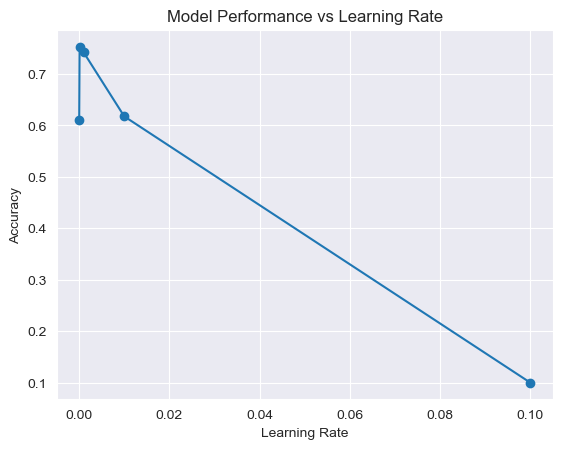

In [4]:
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
accuracies = []

for lr in learning_rates:
    # Create the model with the current learning rate
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the current learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

    # Evaluate the model and record accuracy
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    accuracies.append(test_acc)

# Plotting
plt.plot(learning_rates, accuracies, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Learning Rate')
plt.show()
